In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading the data
df = pd.read_csv('gurgaon_properties.csv')
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586,3,2,2,2,New Property,850.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8597,2,2,2,4,New Property,1226.0,1,1,0,0,0,0,38
2,flat,breez global hill view,sohna road,0.32,5470,2,2,1,17,New Property,1000.0,0,0,0,0,0,0,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020,3,4,3+,10,Relatively New,1615.0,0,1,0,0,1,1,174
4,flat,suncity avenue,sector 102,0.48,9023,2,2,1,5,Relatively New,582.0,0,0,1,0,0,0,159


In [6]:
df.shape

(3554, 18)

Luxuary Score Column

In [8]:
# Converting  luxury score value into categorical term
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None

In [10]:
df['luxury_category'] = df['luxury_score'].apply(categorize_luxury)
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,signature global park 4,sector 36,0.82,7586,3,2,2,2,New Property,850.0,0,0,0,0,0,0,8,Low
1,flat,smart world gems,sector 89,0.95,8597,2,2,2,4,New Property,1226.0,1,1,0,0,0,0,38,Low
2,flat,breez global hill view,sohna road,0.32,5470,2,2,1,17,New Property,1000.0,0,0,0,0,0,0,49,Low
3,flat,bestech park view sanskruti,sector 92,1.60,8020,3,4,3+,10,Relatively New,1615.0,0,1,0,0,1,1,174,High
4,flat,suncity avenue,sector 102,0.48,9023,2,2,1,5,Relatively New,582.0,0,0,1,0,0,0,159,High


Categorize floor number

In [11]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None
    
    

In [13]:
df['floor_category'] = df['floorNum'].apply(categorize_floor)

In [14]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,signature global park 4,sector 36,0.82,7586,3,2,2,2,New Property,850.0,0,0,0,0,0,0,8,Low,Low Floor
1,flat,smart world gems,sector 89,0.95,8597,2,2,2,4,New Property,1226.0,1,1,0,0,0,0,38,Low,Mid Floor
2,flat,breez global hill view,sohna road,0.32,5470,2,2,1,17,New Property,1000.0,0,0,0,0,0,0,49,Low,High Floor
3,flat,bestech park view sanskruti,sector 92,1.60,8020,3,4,3+,10,Relatively New,1615.0,0,1,0,0,1,1,174,High,Mid Floor
4,flat,suncity avenue,sector 102,0.48,9023,2,2,1,5,Relatively New,582.0,0,0,1,0,0,0,159,High,Mid Floor


In [31]:
df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [32]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = df.copy()

categorical_cols = df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['.', '4s aradhya homes', '511 sarahah tower', 'aardhya homesh',
       'ace palm floors', 'adani aangan arcade', 'adani aangan galleria',
       'adani brahma samsara', 'adani brahma samsara vilasa',
       'adani m2k oyster grande', 'adani oyster greens', 'adarsh nagar',
       'aditya apartment', 'afnhb jalvayu vihar',
       'aindependentt raj estates', 'aipl club residences',
       'aipl joy square', 'aipl peaceful homes',
       'aipl the peaceful homes', 'aipl zen residences', 'allure homes',
       'alpha corp gurgaonone', 'ambience caitriona',
       'ambience creacions', 'ambience lagoon', 'anamika enclave',
       'ansal api celebrity suites', 'ansal api esencia',
       'ansal api spanish court', 'ansal api sushant estate',
       'ansal celebrity homes', 'ansal estella', 'ansal florence super',
       'ansal harmony homes', 'ansal height 86', 'ansal heights',
       'ansal heights 86', 'ansal housing highland park',
       '

In [33]:
X_label

,property_type,society,sector,price_per_sqft,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,508.0,36.0,7586,3,2,2.0,1.0,850.0,0,0,0,0,0,0,1.0,1.0
1,0.0,521.0,95.0,8597,2,2,2.0,1.0,1226.0,1,1,0,0,0,0,1.0,2.0
2,0.0,102.0,103.0,5470,2,2,1.0,1.0,1000.0,0,0,0,0,0,0,1.0,0.0
3,0.0,81.0,99.0,8020,3,4,4.0,3.0,1615.0,0,1,0,0,1,1,0.0,2.0
4,0.0,547.0,5.0,9023,2,2,1.0,3.0,582.0,0,0,1,0,0,0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,389.0,90.0,6346,2,2,1.0,3.0,532.0,0,0,0,0,0,0,2.0,2.0
3550,1.0,261.0,12.0,9634,5,5,4.0,3.0,6228.0,1,1,1,1,0,0,0.0,1.0
3551,0.0,26.0,23.0,8163,1,1,1.0,0.0,665.0,0,0,0,0,0,1,2.0,2.0
3552,1.0,258.0,44.0,28233,5,6,3.0,0.0,5490.0,1,1,1,1,0,0,2.0,2.0


In [34]:
y_label

0        0.82
1        0.95
2        0.32
3        1.60
4        0.48
        ...  
3549     0.37
3550     6.00
3551     0.60
3552    15.50
3553     1.78
Name: price, Length: 3554, dtype: float64

# Method 1 - Correlation Analysis

<Axes: >

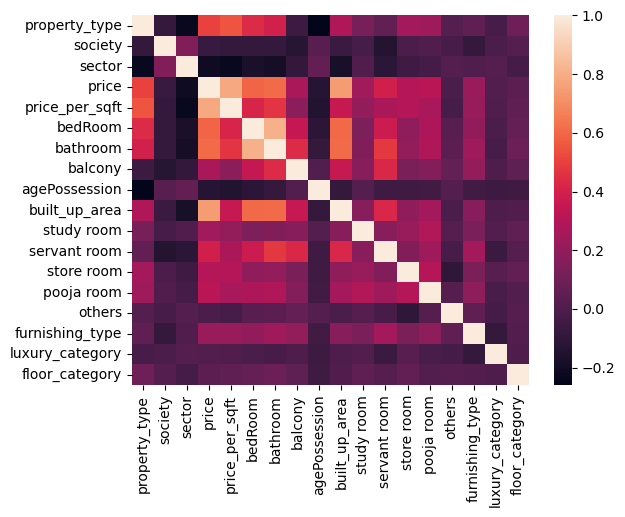

In [35]:
sns.heatmap(data_label_encoded.corr())

In [36]:
ca_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
ca_df1

,feature,corr_coeff
0,society,-0.068169
1,sector,-0.212084
2,price,1.000000
3,price_per_sqft,0.787437
4,bedRoom,0.591289
5,bathroom,0.609777
6,balcony,0.269637
7,agePossession,-0.134171
8,built_up_area,0.748574
9,study room,0.242955


# Method 2 - Random Forest 

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
rf_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

rf_df2

,feature,rf_importance
3,price_per_sqft,0.579017
8,built_up_area,0.393339
1,society,0.008002
2,sector,0.004642
5,bathroom,0.004403
4,bedRoom,0.002692
15,luxury_category,0.001446
7,agePossession,0.001303
16,floor_category,0.000972
6,balcony,0.000878


# Method 3 - Gradient Boosting 

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
gb_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

gb_df3

,feature,gb_importance
3,price_per_sqft,0.588267
8,built_up_area,0.400088
1,society,0.004668
5,bathroom,0.002838
4,bedRoom,0.001894
10,servant room,0.000795
2,sector,0.000438
15,luxury_category,0.000311
12,pooja room,0.000306
6,balcony,0.000140


# Method 4 - Permutation Importance

In [39]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
3,price_per_sqft,0.774369
8,built_up_area,0.737834
1,society,0.002889
4,bedRoom,0.002752
2,sector,0.001824
5,bathroom,0.001191
6,balcony,0.000534
10,servant room,0.000337
0,property_type,0.000256
11,store room,0.000163


# Method 5 - LASSO

In [40]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
3,price_per_sqft,1.600129
8,built_up_area,1.446542
4,bedRoom,0.094076
9,study room,0.070914
11,store room,0.043196
12,pooja room,0.042222
2,sector,0.040454
10,servant room,0.024999
0,property_type,0.023340
1,society,0.018870


# Method  6 - RFE

In [41]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
3,price_per_sqft,0.582404
8,built_up_area,0.388697
1,society,0.007649
2,sector,0.004675
5,bathroom,0.004422
4,bedRoom,0.003706
15,luxury_category,0.001709
7,agePossession,0.001066
9,study room,0.001001
6,balcony,0.000906


# Method 7 - Linear Regression Weights

In [42]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
3,price_per_sqft,1.606694
8,built_up_area,1.456407
4,bedRoom,0.116108
9,study room,0.075928
2,sector,0.051871
11,store room,0.048837
12,pooja room,0.044188
10,servant room,0.042457
1,society,0.028676
13,others,0.027944


Comparison of all methods

In [44]:
final_fi_df = ca_df1.merge(rf_df2,on='feature').merge(gb_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [45]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
society,-0.068169,0.008002,0.004668,0.002889,0.018870,0.007649,0.028676
sector,-0.212084,0.004642,0.000438,0.001824,0.040454,0.004675,0.051871
price_per_sqft,0.787437,0.579017,0.588267,0.774369,1.600129,0.582404,1.606694
bedRoom,0.591289,0.002692,0.001894,0.002752,0.094076,0.003706,0.116108
bathroom,0.609777,0.004403,0.002838,0.001191,0.000000,0.004422,-0.028823
balcony,0.269637,0.000878,0.000140,0.000534,-0.112689,0.000906,-0.132080
agePossession,-0.134171,0.001303,0.000114,-0.000253,-0.000000,0.001066,-0.002760
built_up_area,0.748574,0.393339,0.400088,0.737834,1.446542,0.388697,1.456407
study room,0.242955,0.000428,0.000031,0.000008,0.070914,0.001001,0.075928


In [46]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)


In [78]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

feature
price_per_sqft     0.564782
built_up_area      0.416853
society            0.005556
bathroom           0.003112
sector             0.002740
bedRoom            0.002526
luxury_category    0.000806
agePossession      0.000579
balcony            0.000569
servant room       0.000492
floor_category     0.000449
furnishing_type    0.000380
study room         0.000366
pooja room         0.000295
store room         0.000290
others             0.000205
dtype: float64

# Using RandomForestRegressor

In [79]:
# with all 17 features
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [80]:
scores.mean()

0.9454397701694379

In [82]:
# with 10 features 
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others','store room','furnishing_type','servant room']), y_label, cv=5, scoring='r2')

In [83]:
scores.mean()

0.9445665810322212

# Using GradientBoostingRegressor

In [56]:
# with all 16 features
from sklearn.model_selection import cross_val_score

rf = GradientBoostingRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')


In [57]:
scores.mean()

0.9435144108750129

In [59]:
# with 10 features 
rf = GradientBoostingRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others','study room','furnishing_type','servant room']), y_label, cv=5, scoring='r2')

In [60]:
scores.mean()

0.9424621529106642

# Using DecisionTreeRegressor

In [65]:
# with all 16 features
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

rf = DecisionTreeRegressor( random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')


In [66]:
scores.mean()

0.9007907642315416

In [67]:
# with 10 features 
rf = DecisionTreeRegressor( random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others','study room','furnishing_type','servant room']), y_label, cv=5, scoring='r2')

In [68]:
scores.mean()

0.9037566620222647

In [84]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others','store room','furnishing_type','servant room'])
export_df['price'] = y_label

In [85]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [87]:
export_df

,property_type,society,sector,price_per_sqft,bedRoom,bathroom,balcony,agePossession,built_up_area,luxury_category,floor_category,price
0,0.0,508.0,36.0,7586,3,2,2.0,1.0,850.0,1.0,1.0,0.82
1,0.0,521.0,95.0,8597,2,2,2.0,1.0,1226.0,1.0,2.0,0.95
2,0.0,102.0,103.0,5470,2,2,1.0,1.0,1000.0,1.0,0.0,0.32
3,0.0,81.0,99.0,8020,3,4,4.0,3.0,1615.0,0.0,2.0,1.60
4,0.0,547.0,5.0,9023,2,2,1.0,3.0,582.0,0.0,2.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,389.0,90.0,6346,2,2,1.0,3.0,532.0,2.0,2.0,0.37
3550,1.0,261.0,12.0,9634,5,5,4.0,3.0,6228.0,0.0,1.0,6.00
3551,0.0,26.0,23.0,8163,1,1,1.0,0.0,665.0,2.0,2.0,0.60
3552,1.0,258.0,44.0,28233,5,6,3.0,0.0,5490.0,2.0,2.0,15.50
